## Surface temperature - all models together

time mean \
Annual \
Seasonal \
Monthly
<br />

In [2]:
import xarray as xr
import numpy as np
import skimage.measure as skm
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


switch = {
    'local_files': True, 
    'nci_files': False, 
}

In [38]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

model = models[0]

experiments = [
    'historical',
    # 'rcp85',
    ]
    
experiment = experiments[0]

In [4]:
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_tas_tMean_' + experiment + '.nc'
path = folder + '/' + fileName
tas_tMean = xr.open_dataset(path).tas_tMean

fileName = model + '_tas_sMean_' + experiment + '.nc'
path = folder + '/' + fileName
tas_sMean = xr.open_dataset(path).tas_sMean

In [5]:
aWeights = np.cos(np.deg2rad(tas_tMean.lat))

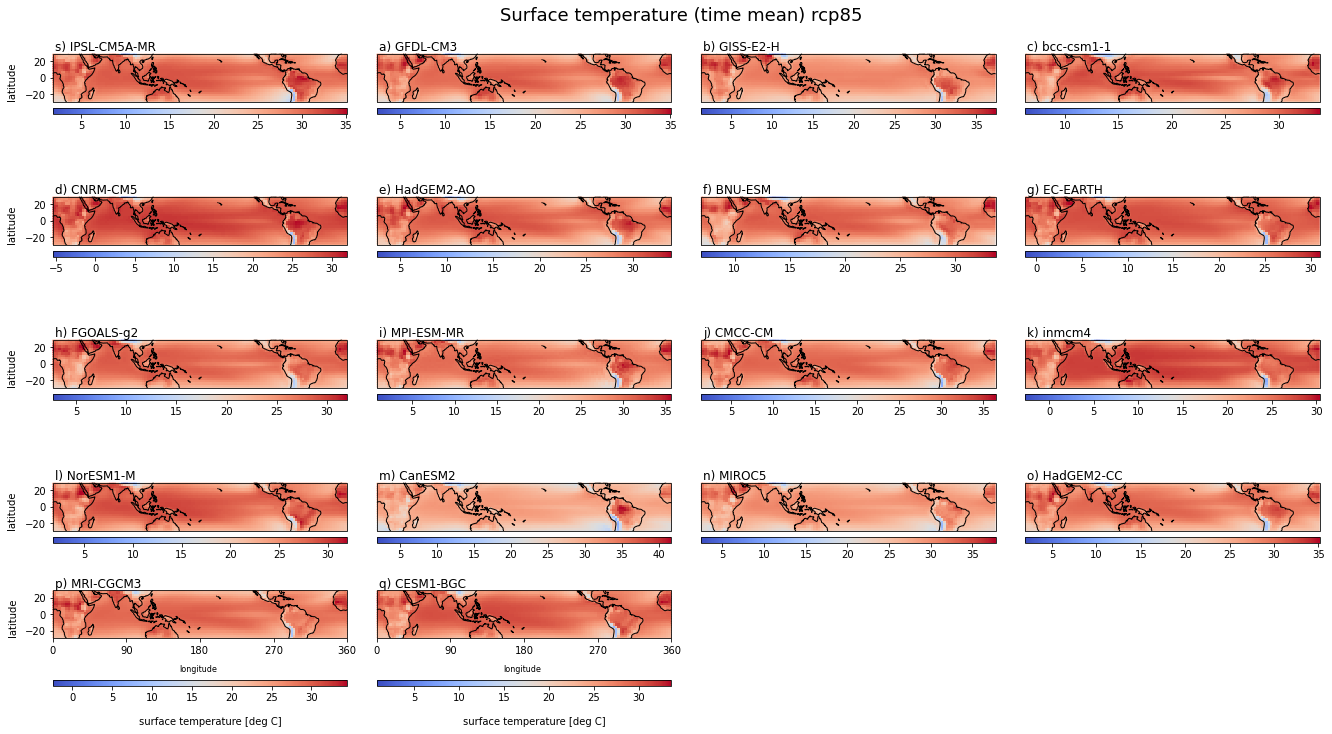

In [6]:
fig= plt.figure(figsize=(22,12))
#fig.suptitle("Rx5day (annual)", fontsize=18, y=0.95)

lat = tas_tMean.lat
lon = tas_tMean.lon
lonm,latm = np.meshgrid(lon,lat)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_tas_tMean_' + experiment + '.nc'
    path = folder + '/' + fileName
    tas_tMean = xr.open_dataset(path).tas_tMean

    ax= fig.add_subplot(5,4,i+1, projection=ccrs.PlateCarree(central_longitude=180)) #gridspec, specify subplot size here
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    pcm= ax.pcolormesh(lonm,latm, tas_tMean,transform=ccrs.PlateCarree(),zorder=0, cmap='coolwarm') #'"RdBu_r", vmin=-np.max(tas_tMean.values), vmax=np.max(tas_tMean.values)) #,vmin=0,vmax=12)

    letters='abcdefghijklmnopqrs'
    plt.text(-177.5, 32.5, letters[i-1] + ') ' + model, fontsize=12)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_yticks([-20, 0, 20])
        plt.text(-235,-25, 'latitude', rotation=90)


    if i>=16:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.35, aspect=50, fraction=0.055)
        plt.text(-25,-70, 'longitude',fontsize=8)
        plt.text(-75,-135, 'surface temperature [deg C]',fontsize=10)
        ax.set_xticks([-180, -90, 0, 90, 180])
        ax.set_xticklabels([0, 90, 180, 270, 360])
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.05, aspect=50, fraction=0.055) #shrink=




plt.text(-30,725, 'Surface temperature (time mean) ' + experiment,fontsize=18)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.1) #, hspace=0.2)

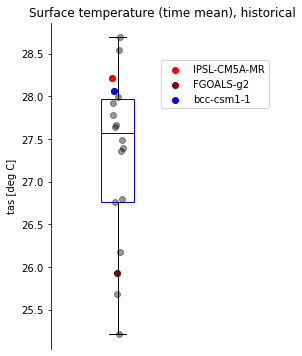

In [7]:
y= []
for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_tas_tMean_' + experiment + '.nc'
    path = folder + '/' + fileName
    tas_tMean = xr.open_dataset(path).tas_tMean
    y = np.append(y, tas_tMean.weighted(aWeights).mean(dim=('lat','lon')))

plt.figure(figsize=(4,6))
plt.xlim(0,1)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))


x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)
#plt.scatter(np.ones(len(y)), y)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1


plt.xticks([])
plt.title('Surface temperature (time mean), historical')
plt.ylabel('tas [deg C]')
plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))
# plt.ylim(22.5,25.5)

sns.despine(top=True, right=True, left=False, bottom=True)

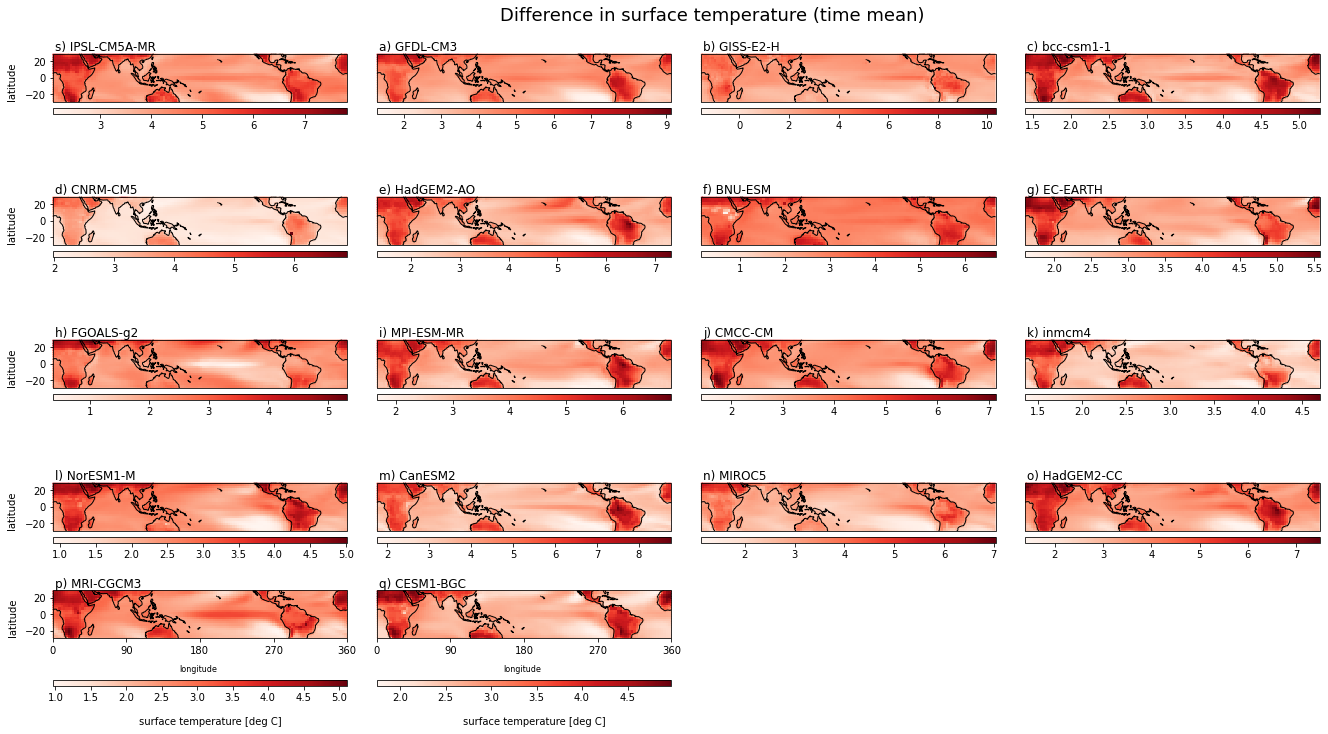

In [8]:
fig= plt.figure(figsize=(22,12))
#fig.suptitle("Rx5day (annual)", fontsize=18, y=0.95)

lat = tas_tMean.lat
lon = tas_tMean.lon
lonm,latm = np.meshgrid(lon,lat)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_tas_tMean_historical.nc'
    path = folder + '/' + fileName
    tas_tMean_historical = xr.open_dataset(path).tas_tMean

    fileName = model + '_tas_tMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_tMean_rcp85 = xr.open_dataset(path).tas_tMean

    tas_tMean_difference = tas_tMean_rcp85 - tas_tMean_historical


    ax= fig.add_subplot(5,4,i+1, projection=ccrs.PlateCarree(central_longitude=180)) #gridspec, specify subplot size here
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

    pcm= ax.pcolormesh(lonm,latm, tas_tMean_difference,transform=ccrs.PlateCarree(),zorder=0, cmap='Reds') #,vmin=0,vmax=12)

    letters='abcdefghijklmnopqrs'
    plt.text(-177.5, 32.5, letters[i-1] + ') ' + model, fontsize=12)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_yticks([-20, 0, 20])
        plt.text(-235,-25, 'latitude', rotation=90)


    if i>=16:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.35, aspect=50, fraction=0.055)
        plt.text(-25,-70, 'longitude',fontsize=8)
        plt.text(-75,-135, 'surface temperature [deg C]',fontsize=10)
        ax.set_xticks([-180, -90, 0, 90, 180])
        ax.set_xticklabels([0, 90, 180, 270, 360])
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.05, aspect=50, fraction=0.055) #shrink=




plt.text(-30,725, 'Difference in surface temperature (time mean)',fontsize=18)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.1) #, hspace=0.2)

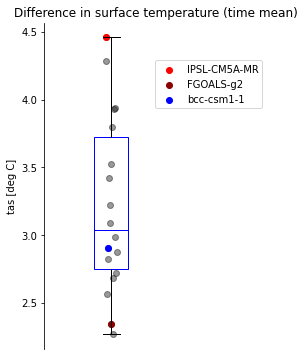

In [9]:
y= []
for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_tas_tMean_historical.nc'
    path = folder + '/' + fileName
    tas_tMean_historical = xr.open_dataset(path).tas_tMean

    fileName = model + '_tas_tMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_tMean_rcp85 = xr.open_dataset(path).tas_tMean

    tas_tMean_difference = tas_tMean_rcp85 - tas_tMean_historical

    y = np.append(y, tas_tMean_difference.weighted(aWeights).mean(dim=('lat','lon')))

plt.figure(figsize=(4,6))
plt.xlim(0,1)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))


x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)
#plt.scatter(np.ones(len(y)), y)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1


plt.xticks([])
plt.title('Difference in surface temperature (time mean)')
plt.ylabel('tas [deg C]')

plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))
#plt.ylim(22.5,25.5)

sns.despine(top=True, right=True, left=False, bottom=True)

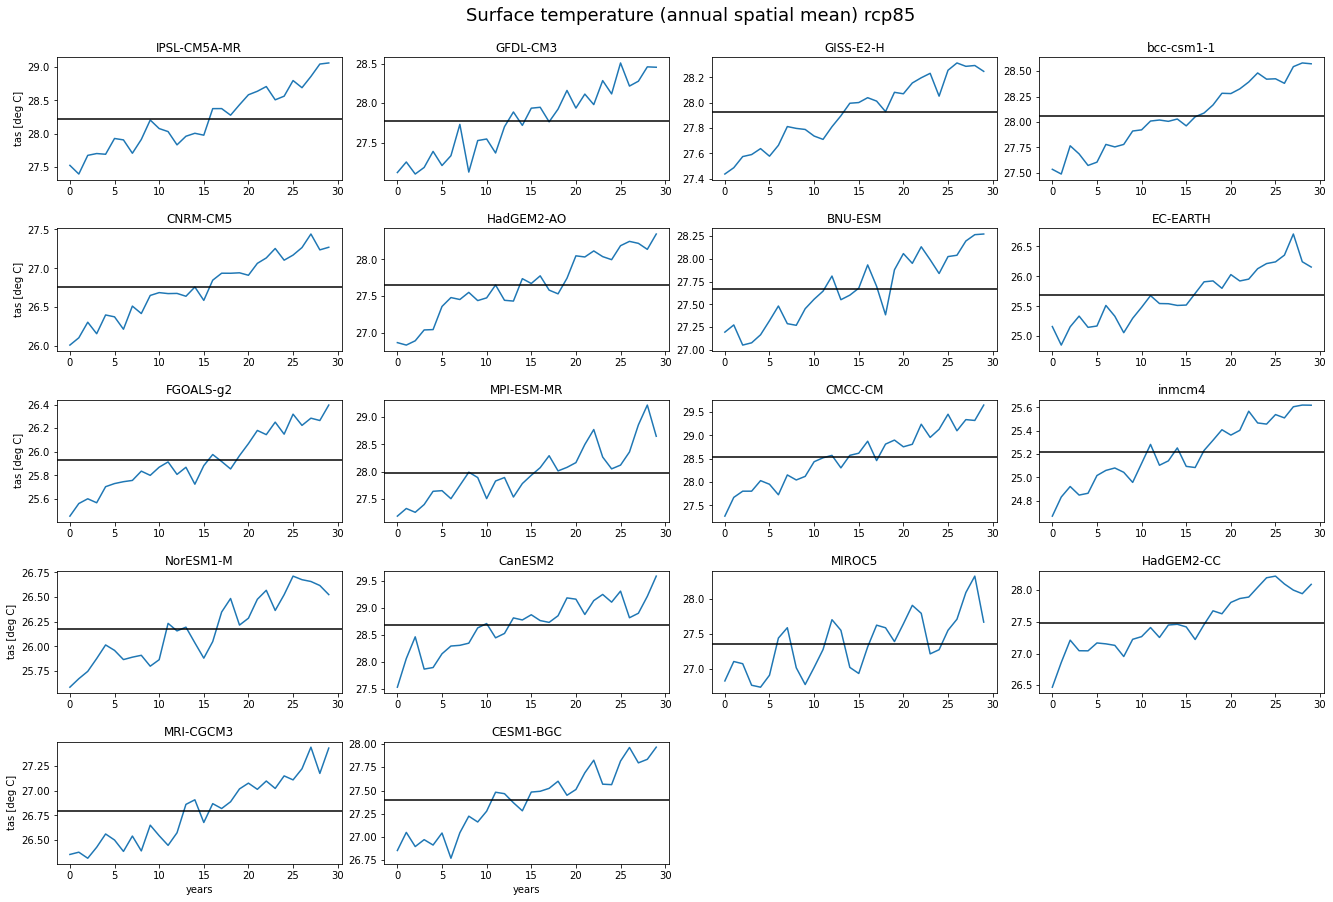

In [10]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle('Surface temperature (annual spatial mean) ' + experiment, fontsize=18, y=0.95)


for model, ax in zip(models, axes.ravel()):

    if ax is None:
        # skip the subplot if it is None
        continue

    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_tas_sMean_' + experiment + '.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean

    ax.plot(tas_sMean.resample(time='Y').mean(dim='time'))
    ax.axhline(y=tas_sMean.mean(dim='time'), color='k')
    ax.set_title(model)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel('tas [deg C]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

In [11]:
def to_monthly(da):
    year = da.time.dt.year
    month = da.time.dt.month

    # assign new coords
    da = da.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return da.set_index(time=("year", "month")).unstack("time")

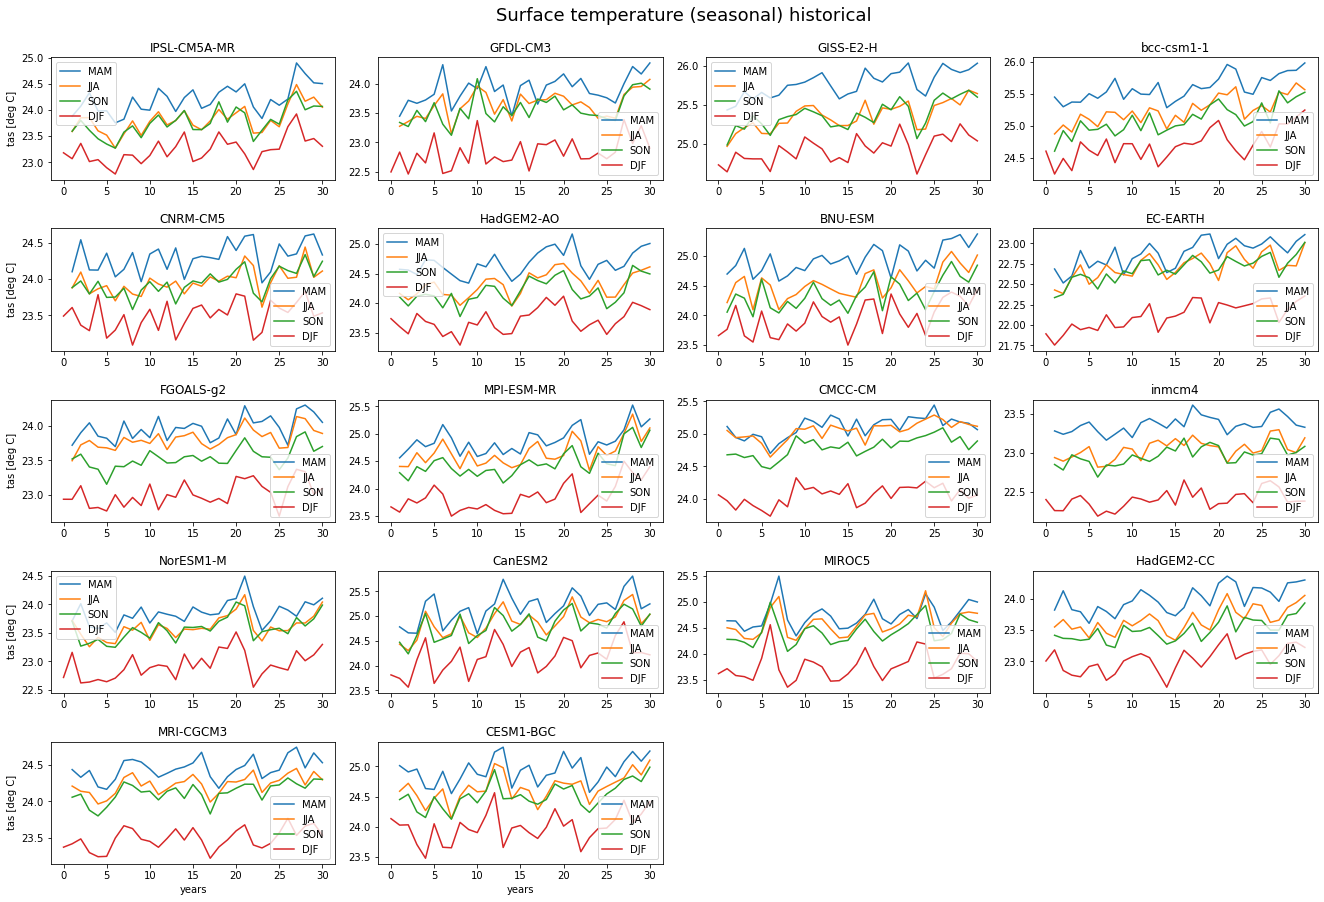

In [22]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle('Surface temperature (seasonal) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_tas_sMean_' + experiment + '.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean

    tas_season = tas_sMean.resample(time='QS-DEC').mean(dim="time")
    tas_season = to_monthly(tas_season)
    tas_season = tas_season.rename({'month':'season'})
    tas_season = tas_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

    ax.plot(tas_season, label = tas_season.season.values)
    ax.set_title(model)
    ax.legend()

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('years')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel('tas [deg C]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

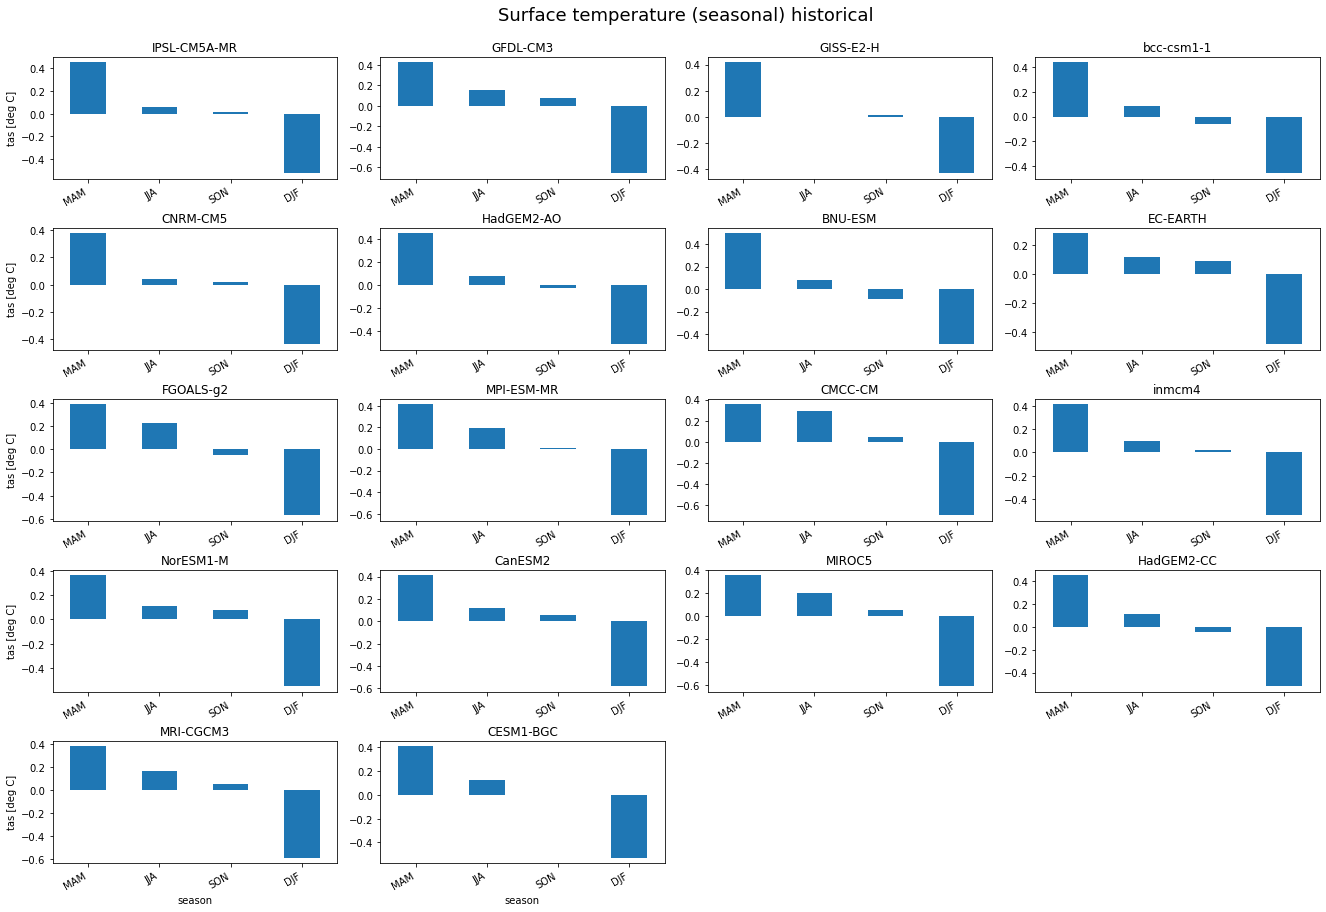

In [39]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle('Surface temperature (seasonal) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_tas_sMean_' + experiment + '.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean

    tas_season = tas_sMean.resample(time='QS-DEC').mean(dim="time")
    tas_season = to_monthly(tas_season)
    tas_season = tas_season.rename({'month':'season'})
    tas_season = tas_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

    (tas_season.mean(dim='year') - tas_season.mean(dim='year').mean(dim='season')).to_series() .plot.bar(ax=ax)
    ax.set_title(model)
    ax.set_xlabel('')
    ax.set_xticklabels(tas_season.season.values, rotation=30, ha='right')

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('season')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel('tas [deg C]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

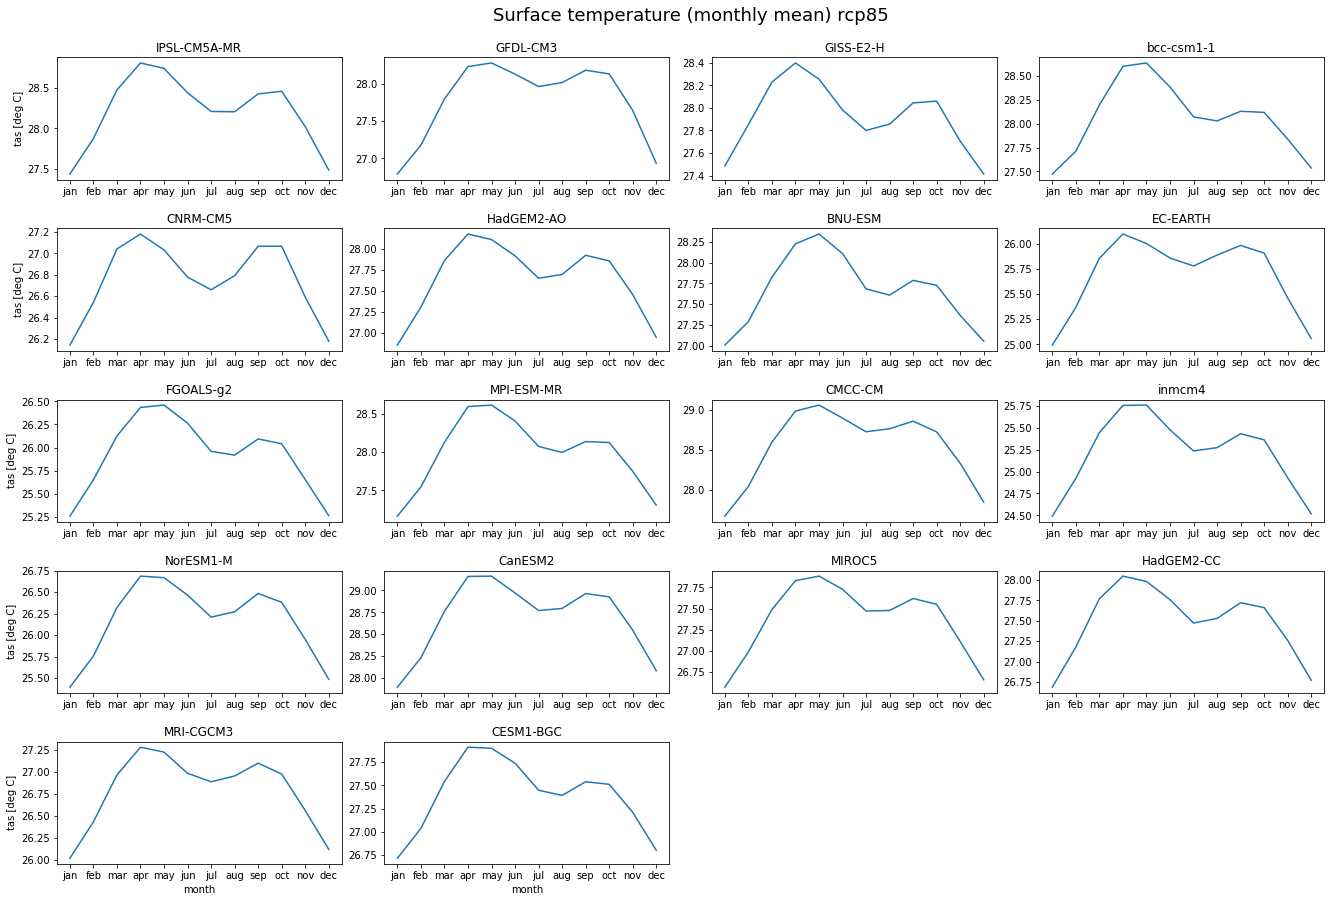

In [ ]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle('Surface temperature (monthly mean) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_tas_sMean_' + experiment + '.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean

    tas_monthly = to_monthly(tas_sMean)
    tas_monthly = tas_monthly.assign_coords(month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'])

    ax.plot(tas_monthly.mean(dim='year'))
    ax.set_title(model)
    ax.set_xticks(np.arange(0,12))
    ax.set_xticklabels(tas_monthly.month.values)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('month')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel('tas [deg C]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()

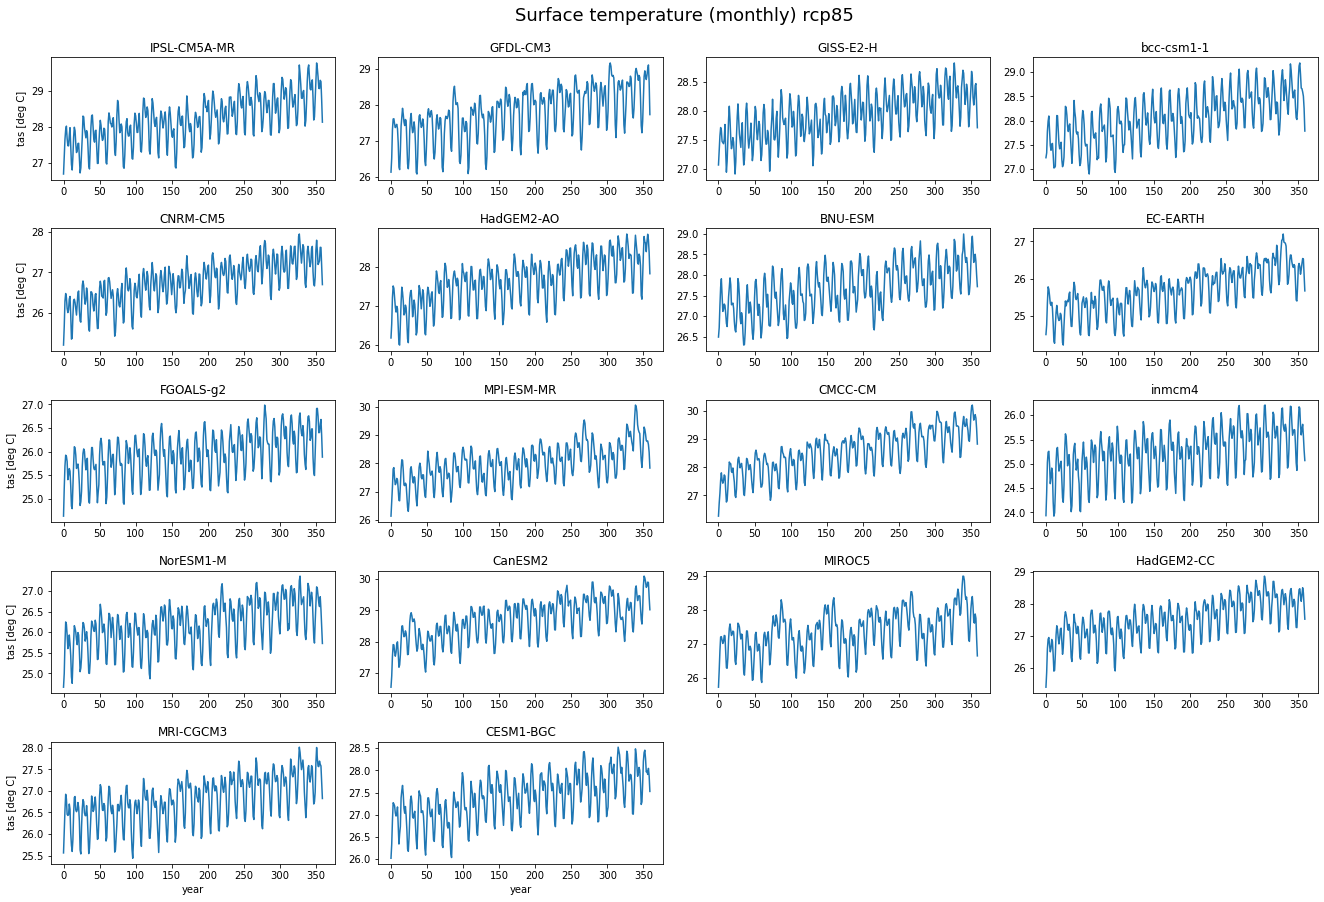

In [ ]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (22,14))
f.suptitle('Surface temperature (monthly) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_tas_sMean_' + experiment + '.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean


    ax.plot(tas_sMean)
    ax.set_title(model)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('year')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel('tas [deg C]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()